In [31]:
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt


filename = 'df_imputed__OHE_cat_std_num.pkl'
df = pd.read_pickle(filename)

In [32]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score

X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])


train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.2, random_state=45)






In [33]:
#Building Models according to the best hyperparameters
#found by RandomSearchCV
model_Linear_SVM=svm.SVC(kernel='linear',C=0.01,gamma=10000, probability=True)
model_RBF_SVM = svm.SVC(kernel='rbf',C=100,gamma=1e-3, probability=True)
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 0.01)
model_Decision_Tree =DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=16,
            max_features=None, max_leaf_nodes=15, min_samples_leaf=4,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
model_RandomForest = RandomForestClassifier(n_estimators= 200,
               max_features= 'auto',
               max_depth= 20,
               min_samples_split= 2,
               min_samples_leaf= 4,
               bootstrap= True)

model_KNN = KNeighborsClassifier(n_neighbors=22)


In [36]:
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer


scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

kfold = StratifiedKFold(n_splits=10, random_state=1) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[model_Linear_SVM, model_RBF_SVM, model_Logistic_Regression, model_KNN, model_Decision_Tree,  model_RandomForest ]

fit_time = []
score_time = []

test_accuracy = []
test_accuracy_total = []

test_accuracy_std = []
train_accuracy = []
train_accuracy_total = []
train_accuracy_std = []


test_F_score = []
test_F_score_total = []


test_F_score_std = []
train_F_score = []
train_F_score_total = []

train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []






for i in models:
    model = i
    scores = cross_validate(model,X,y, cv = kfold, scoring = scoring, return_train_score=True)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_total.append(scores['test_accuracy'])
    
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_total.append(scores['train_accuracy'])
                          
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_total.append(scores['test_F-score'])
    
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_total.append(scores['train_F-score'])
                         
                         
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)



#new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
#new_models_dataframe2

Model: SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10000, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Model: SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Model: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform')
Model: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=16,
      

,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
Linear Svm,0.794488,0.063835,0.806521,0.010594
Radial Svm,0.785839,0.063913,0.805434,0.011202
Logistic Regression,0.797749,0.074869,0.806159,0.008177
KNN,0.788025,0.064258,0.816183,0.007864
Decision Tree,0.752084,0.061399,0.800361,0.008903
Random Forest,0.791215,0.067269,0.870410,0.006455


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
Linear Svm,0.817840,0.051922,0.828099,0.010194
Radial Svm,0.809873,0.054112,0.827533,0.010542
Logistic Regression,0.821518,0.064357,0.828219,0.007085
KNN,0.813897,0.054126,0.837941,0.007011
Decision Tree,0.784065,0.049629,0.827639,0.009184
Random Forest,0.817955,0.053047,0.887159,0.005591


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
Linear Svm,0.814184,0.080537,0.814204,0.008757
Radial Svm,0.803875,0.075264,0.811825,0.008516
Logistic Regression,0.810127,0.079806,0.812514,0.008436
KNN,0.799564,0.077739,0.817956,0.007727
Decision Tree,0.764552,0.071380,0.792285,0.012452
Random Forest,0.801211,0.076659,0.855941,0.006055


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
Linear Svm,0.829255,0.068306,0.842610,0.015673
Radial Svm,0.823373,0.076245,0.843918,0.014219
Logistic Regression,0.841059,0.087314,0.844576,0.007416
KNN,0.837059,0.078786,0.858982,0.009130
Decision Tree,0.811294,0.068936,0.867058,0.025665
Random Forest,0.842980,0.069977,0.920759,0.006409


,Fit_time,Scoring Time
Linear Svm,0.053805,0.006909
Radial Svm,0.102994,0.011280
Logistic Regression,0.002140,0.002561
KNN,0.001649,0.014313
Decision Tree,0.001569,0.002352
Random Forest,0.271765,0.053024


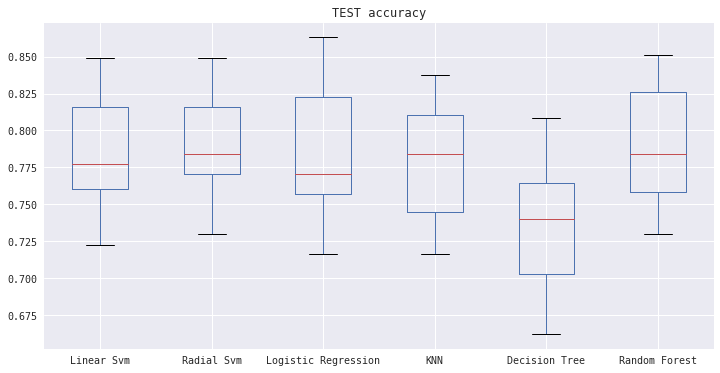

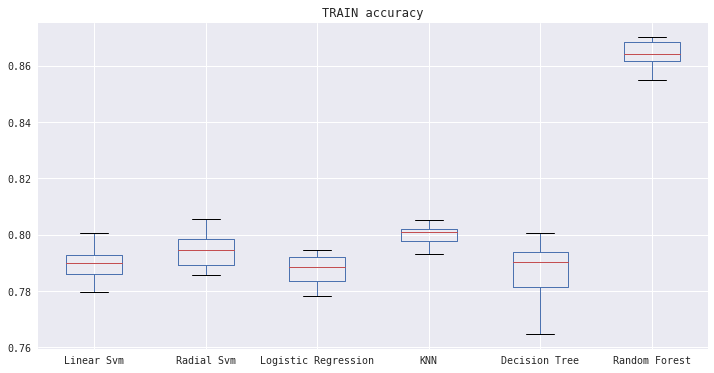

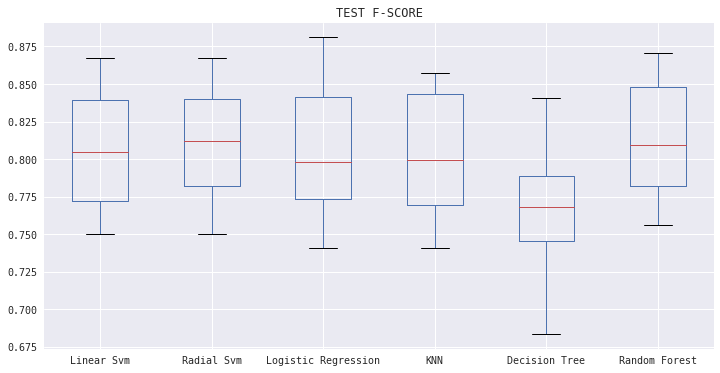

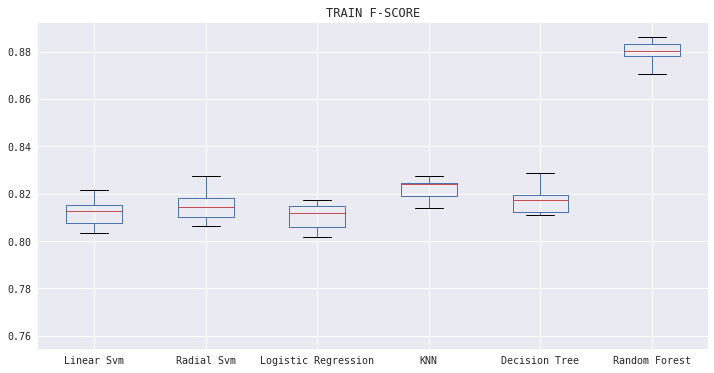

In [35]:
plt.figure(figsize=(12,6))
plt.title('TEST accuracy')
box_test_accuracy=pd.DataFrame(test_accuracy_total,index=[classifiers])
box_test_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN accuracy')
box_train_accuracy=pd.DataFrame(train_accuracy_total,index=[classifiers])
box_train_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TEST F-SCORE')
box_test_F_score=pd.DataFrame(test_F_score_total,index=[classifiers])
box_test_F_score.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN F-SCORE')
box_train_F_score=pd.DataFrame(train_F_score_total,index=[classifiers])
box_train_F_score.T.boxplot()
plt.show()



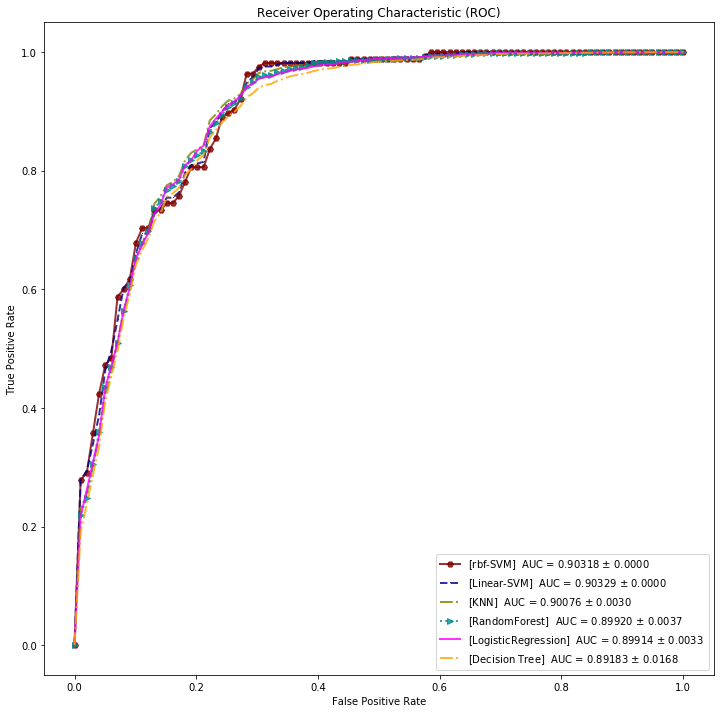

,AUC Mean,std
rbf-SVM,0.903181,0.000028
Linear-SVM,0.903295,0.000035
KNN,0.900758,0.003027
RandomForest,0.899205,0.003696
LogisticRegression,0.899143,0.003310
Decision Tree,0.891834,0.016799


In [18]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#'aqua', 'darkorange', 'cornflowerblue'
models = [
    {
        'label' : 'rbf-SVM',
        'model': model_RBF_SVM,
        'color': 'maroon',
        'linestyle': 'solid', 
        'markers': 'H',
         
    },
    {
        'label' : 'Linear-SVM',
        'model': model_Linear_SVM,
        'color': 'navy',
        'linestyle': 'dashed',
        'markers': ',',
    },
    {
        'label' : 'KNN',
        'model': model_KNN, 
        'color': 'olive',
        'linestyle': 'dashdot',
        'markers': '',
    },    
    {
        'label' : 'RandomForest',
        'model': model_RandomForest,
        'color': 'darkcyan',
        'linestyle': 'dotted',
        'markers': '>',
       
    },        
    {
        'label' : 'LogisticRegression',
        'model': model_Logistic_Regression,
        'color': 'fuchsia',
        'linestyle': '-',
        'markers': ''
 
    },
    {
        'label' : 'Decision Tree',
        'model': model_Decision_Tree, 
        'color': 'orange',
        'linestyle': '-.',
        'markers': ''
    },

]







# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
std_mean = []


   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for train, test in cv.split(X, y):
        probas_ = m['model'].fit(train_X, train_y).predict_proba(test_X)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    #plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    #         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)

    aucs_mean.append(mean_auc)
    std_mean.append(std_auc)
    labels.append(m['label']) 
    



    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

plt.show()
AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':std_mean },index = labels)       
AUCs



In [20]:
from sklearn.ensemble import VotingClassifier

models=[model_Linear_SVM, model_RBF_SVM, model_Logistic_Regression, model_KNN, model_Decision_Tree,  model_RandomForest ]


ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',model_KNN),
                                              ('RBF',model_RBF_SVM),
                                              ('RFor',model_RandomForest),
                                              ('LR',model_Logistic_Regression),
                                              ('DT',model_Decision_Tree),
                                              ('svm',model_Linear_SVM)
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The accuracy for ensembled model is: 0.8486842105263158


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

The cross validated score is 0.7912506614470148


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
age             920 non-null float64
sex_0           920 non-null float64
sex_1           920 non-null float64
cp_1            920 non-null float64
cp_2            920 non-null float64
cp_3            920 non-null float64
cp_4            920 non-null float64
trestbps        920 non-null float64
chol            920 non-null float64
fbs_0           920 non-null float64
fbs_1           920 non-null float64
restecg         920 non-null float64
thalach         920 non-null float64
exang_0         920 non-null float64
exang_1         920 non-null float64
oldpeak         920 non-null float64
slope_1         920 non-null float64
slope_2         920 non-null float64
slope_3         920 non-null float64
heartdisease    920 non-null int64
dtypes: float64(19), int64(1)
memory usage: 143.8 KB


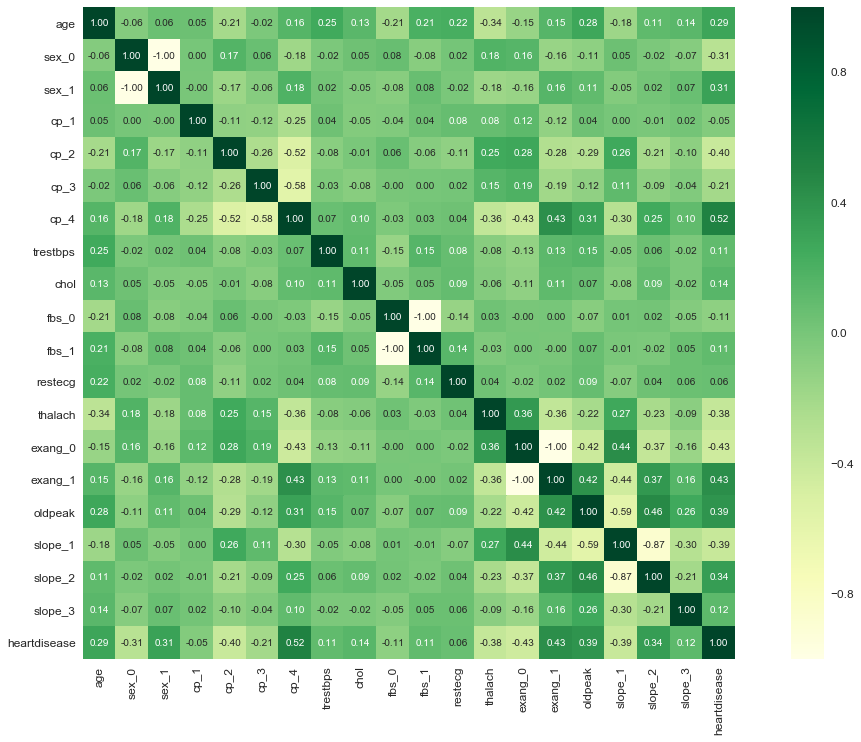

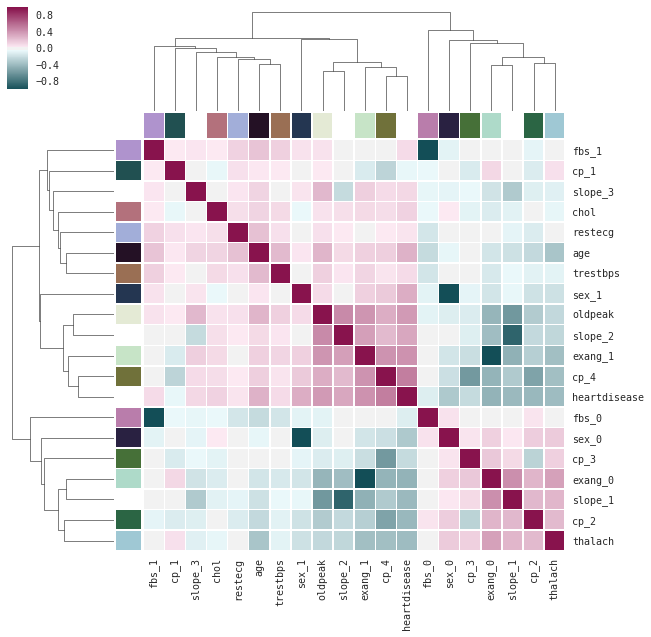

In [29]:
from sklearn.cluster import FeatureAgglomeration
correlations =df.corr()

def extract_numerical_features(df):
    df = df.copy()
    # Identify numerical columns which are of type object
    numerical_features = pd.Series(data=False, index=df.columns, dtype=bool)

    for feature in df.columns:
        if any(tuple(df[feature].apply(lambda x: type(x)) == int)) or \
                any(tuple(df[feature].apply(lambda x: type(x)) == float)) & \
                (not any(tuple(df[feature].apply(lambda x: type(x)) == str))):
            numerical_features[feature] = 1
    return numerical_features[numerical_features == 1].index

num_features = extract_numerical_features(df)
df_aglo = pd.DataFrame(data=df.values, columns=df.columns)


df_total = df_aglo[num_features]

plt.figure(figsize=(20, 12))
top_features = 10

correlation_coeff = np.corrcoef(df_total.astype(float).values.T)
sns.set(font_scale=1.20)
coeff_heatmap = sns.heatmap(correlation_coeff, annot=True, cmap='YlGn', cbar=True,
                            square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=df_total.columns, xticklabels=df_total.columns)
plt.show()



number_of_clusters=int(df_total.shape[1]/1.2)
# Create Dendrogram
agglomerated_features = FeatureAgglomeration(n_clusters=number_of_clusters)
used_networks = np.arange(0, number_of_clusters, dtype=int)
# used_networks = np.unique(agglomerated_features.labels_)

# In our case all columns are clustered, which means used_columns is true in every element
# used_columns = (df.columns.get_level_values(None)
                # .astype(int)
                # .isin(used_networks))
# used_columns = (agglomerated_feature_labels.astype(int).isin(used_networks))
# df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, df_total.columns), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_total.columns.get_level_values(None)
network_colors = pd.Series(networks, index=df_total.columns).map(network_lut)
sns.set(font="monospace")
# Create custom colormap
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
cg = sns.clustermap(df_total.astype(float).corr(), cmap=cmap, linewidths=.5,
                    row_colors=network_colors, col_colors=network_colors)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()




